# Bike sharing data

In [42]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# loading the dataset
bike_daily = pd.read_csv("bike_sharing_daily.csv")
bike_daily['dteday'] = pd.to_datetime(bike_daily['dteday'])
display(bike_daily)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Data characteristics:

Data contains 731 observations spreading over 16 columns:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week (0-Sunday, 1-Monday, ..., 6-Saturday)
- workingday : if day is neither weekend nor holiday is 0, otherwise is 1.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

No missing values are reported in the dataset. The descriptive statistical for numerical variables have been displayed below.

In [61]:
bike_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


### Visualisation of rentals trends overtime

I visualized the rental trends over time by plotting the number of rentals and incorporating a 7-day moving average to reveal underlying patterns. Furthermore, I segmented the visualization to separately display the rental trends for casual and registered users, emphasizing the distinctions between their patterns.

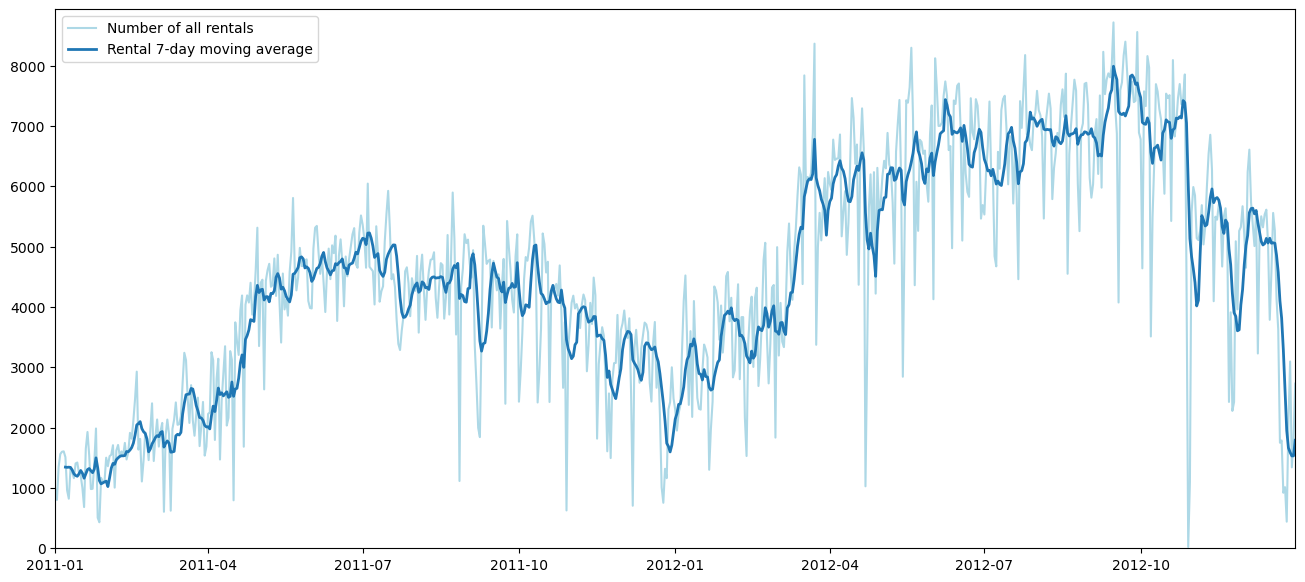

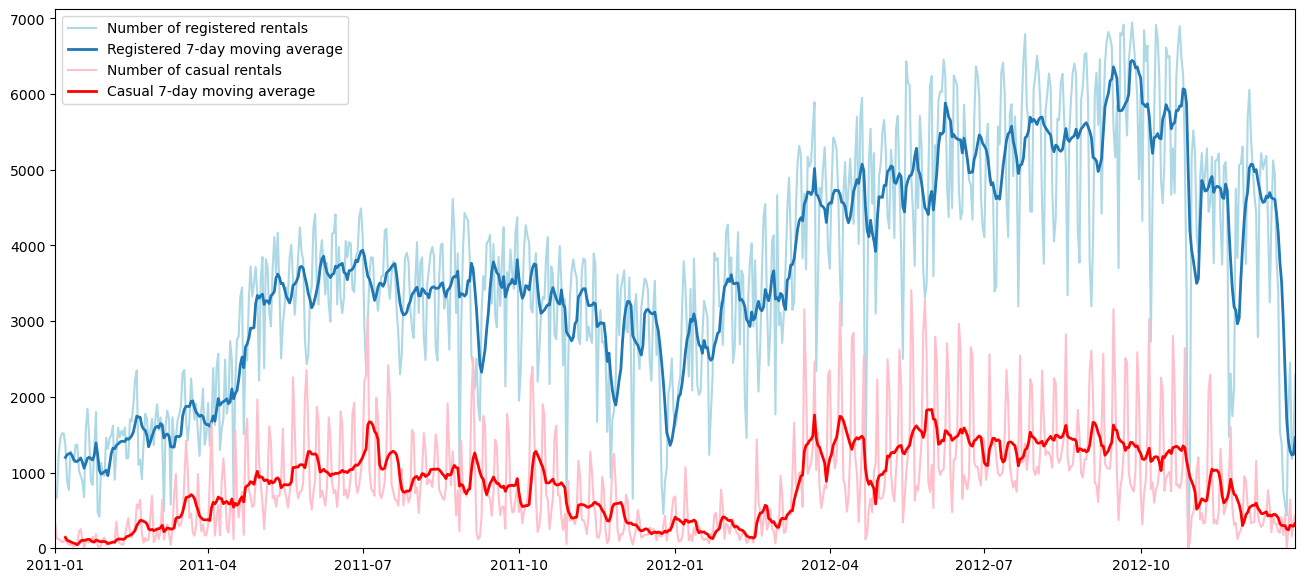

In [38]:
# Visualisation of the data
plt.figure(figsize=(16, 7))
plt.plot(bike_daily['dteday'], bike_daily['cnt'], label='Number of all rentals', color='lightblue')
plt.plot(bike_daily['dteday'], bike_daily['cnt'].rolling(7).mean(), linewidth=2.0, label='Rental 7-day moving average')
plt.xlim([bike_daily['dteday'].min(), bike_daily['dteday'].max()])
plt.ylim([0, bike_daily['cnt'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

# Visualisation depending on the casual or registered member
plt.figure(figsize=(16, 7))
plt.plot(bike_daily['dteday'], bike_daily['registered'], label='Number of registered rentals', color='lightblue')
plt.plot(bike_daily['dteday'], bike_daily['registered'].rolling(7).mean(), linewidth=2.0, label='Registered 7-day moving average')
plt.plot(bike_daily['dteday'], bike_daily['casual'], label='Number of casual rentals', color='pink')
plt.plot(bike_daily['dteday'], bike_daily['casual'].rolling(7).mean(), linewidth=2.0, label='Casual 7-day moving average', color='red')
plt.xlim([bike_daily['dteday'].min(), bike_daily['dteday'].max()])
plt.ylim([0, bike_daily['registered'].max()*1.025])
plt.legend(loc='upper left')
plt.show()


The overtime visualization facilitates the examination of general trends and changes over months of the year and seasons. Potential observations can be further explored, such as the significant influence of seasons on the number of bikes rented, and the notable overall increase in rentals in 2012 compared to 2011. Upon analyzing the data for casual and registered renters, we observe significantly more rented bikes for registered members. Additionally, the 7-day moving averages exhibit different trends, suggesting that specific weekly patterns may vary between these two groups of users.

## Assigment of variables

Independent Features Matrix (X):

- season (categorical)
- yr (categorical)
- mnth (categorical)
- holiday (categorical)
- weekday (categorical)
- workingday (categorical)
- weathersit (categorical)
- temp (continues)
- atemp (continues)
- hum (continues)
- windspeed (continues)

The instant and dteday will be removed from further analysis.

Dependent Target Vector (y):

- casual (continues)
- registered (continues)
- cnt (continues)

In [40]:
bike_daily.drop(['instant', 'dteday'], axis=1, inplace=True)
bike_daily.sample(5)

# assigment of features variable and the target
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','yr', 'mnth','holiday','weekday','workingday','weathersit']
target = 'cnt'


## Exploratory Data Analysis (EDA)

Aiming to characterize the feature variables individually, collectively, and in comparison to the target variable.

### Univariate Analysis


#### Numeric features

In the dataset 4 variable are continues temp, atemp, hum and windspeed, all been normalised. The descriptive statistic have been calculated and histograms plotted below


,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


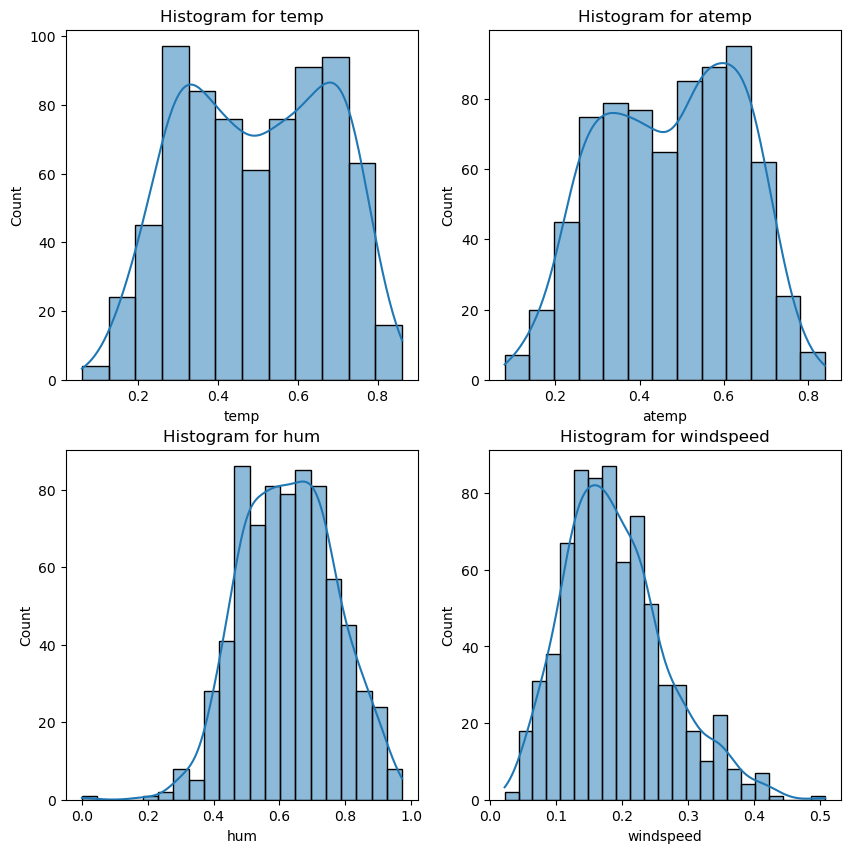

In [60]:
display(bike_daily[numeric_features].describe())

fig, axs = plt.subplots(2,2, figsize=(10, 10))
for f, ax in zip(numeric_features, axs.flat):
    sns.histplot(data=bike_daily, x=f, ax=ax, kde=True)
    ax.set_title(f"Histogram for {f}")
plt.show()

#### Categorical features

